In [15]:
import sys
!{sys.executable} -m pip install tensorflow

                                              0.0/272.8 MB ? eta -:--:--
                                              0.1/272.8 MB 3.5 MB/s eta 0:01:18
                                              0.5/272.8 MB 5.6 MB/s eta 0:00:49
                                              0.8/272.8 MB 6.6 MB/s eta 0:00:42
                                              1.2/272.8 MB 7.1 MB/s eta 0:00:39
                                              1.6/272.8 MB 7.5 MB/s eta 0:00:37
                                              1.8/272.8 MB 7.2 MB/s eta 0:00:38
                                              2.0/272.8 MB 6.0 MB/s eta 0:00:45
                                              2.2/272.8 MB 6.1 MB/s eta 0:00:45
                                              2.5/272.8 MB 6.2 MB/s eta 0:00:44
                                              2.8/272.8 MB 6.2 MB/s eta 0:00:44
                                              3.2/272.8 MB 6.7 MB/s eta 0:00:41
                                              3

### 1. Load and Explore raw Dataset

**[1.1]** Import the packages

In [328]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

**[1.2]** Import data 

In [329]:
# Read in the csv
df = pd.read_csv("../data/raw/beer_reviews.csv")

**[1.3]** Display the first 5 rows of df

In [330]:
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


**[1.4]** Display the last 5 rows of df

In [331]:
df.tail()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
1586609,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586610,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586612,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061
1586613,14359,The Defiant Brewing Company,1160005319,5.0,4.5,4.5,cbl2,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


**[1.5]** Display the dimensions (shape) of df

In [332]:
df.shape

(1586614, 13)

**[1.6]** Display the list of columns of df

In [333]:
df.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

**[1.7]** Display the descriptive statistics of df

In [334]:
df.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


**[1.8]** Display the summary (info) of df

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


### 2.Features Engineering

**[2.1]** Let's create a copy of our training dataframe

In [336]:
df_cleaned = df.copy()

**[2.2]** Select the necessary columns and drop columns 'brewery_id','review_time','review_profilename', 
       'beer_beerid'

In [337]:
# Select necessary columns
df_cleaned = df_cleaned[['review_overall','review_aroma','review_appearance', 'review_palate', 'review_taste', 'beer_abv', 'brewery_name', 'beer_name', 'beer_style']]
df_cleaned.head()

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,brewery_name,beer_name,beer_style
0,1.5,2.0,2.5,1.5,1.5,5.0,Vecchio Birraio,Sausa Weizen,Hefeweizen
1,3.0,2.5,3.0,3.0,3.0,6.2,Vecchio Birraio,Red Moon,English Strong Ale
2,3.0,2.5,3.0,3.0,3.0,6.5,Vecchio Birraio,Black Horse Black Beer,Foreign / Export Stout
3,3.0,3.0,3.5,2.5,3.0,5.0,Vecchio Birraio,Sausa Pils,German Pilsener
4,4.0,4.5,4.0,4.0,4.5,7.7,Caldera Brewing Company,Cauldron DIPA,American Double / Imperial IPA


**[2.3]** Handling missing values

In [338]:
# Handle missing values
df_cleaned['beer_abv'].fillna(df_cleaned['beer_abv'].mean(), inplace=True)
df_cleaned['brewery_name'].fillna('unknown', inplace=True)
df_cleaned['beer_name'].fillna('unknown', inplace=True)

**[2.4] Categorical feature encoding**: Some features like 'brewery_name', 'beer_name', 'beer_style' are categorical variables. We can encode them using techniques such as one-hot encoding or label encoding to represent them numerically. This allows the model to understand the categorical information

In [339]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

In [340]:
# Perform label encoding on the "beer_style" column
df_cleaned["beer_style_encoded"] = label_encoder.fit_transform(df_cleaned["beer_style"])
# Drop the original "beer_style" column
df_cleaned.drop("beer_style", axis=1, inplace=True)

In [341]:
# Perform label encoding on the "beer_name" column
df_cleaned["beer_name_encoded"] = label_encoder.fit_transform(df_cleaned["beer_name"])
# Drop the original "beer_name" column
df_cleaned.drop("beer_name", axis=1, inplace=True)

In [342]:
# Perform label encoding on the "brewery_name" column
df_cleaned["brewery_name_encoded"] = label_encoder.fit_transform(df_cleaned["brewery_name"])
# Drop the original "brewery_name" column
df_cleaned.drop("brewery_name", axis=1, inplace=True)

In [343]:
df_cleaned

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_style_encoded,beer_name_encoded,brewery_name_encoded
0,1.5,2.0,2.5,1.5,1.5,5.0,65,44426,5438
1,3.0,2.5,3.0,3.0,3.0,6.2,51,41738,5438
2,3.0,2.5,3.0,3.0,3.0,6.5,59,6887,5438
3,3.0,3.0,3.5,2.5,3.0,5.0,61,44425,5438
4,4.0,4.5,4.0,4.0,4.5,7.7,9,11359,1480
...,...,...,...,...,...,...,...,...,...
1586609,5.0,4.0,3.5,4.0,4.0,5.2,85,50706,5128
1586610,4.0,5.0,2.5,2.0,4.0,5.2,85,50706,5128
1586611,4.5,3.5,3.0,3.5,4.0,5.2,85,50706,5128
1586612,4.0,4.5,4.5,4.5,4.5,5.2,85,50706,5128


**[2.5] Feature Crosses: Create interaction features by combining different features**

In [344]:
df_cleaned['aroma_taste_interaction'] = df_cleaned['review_aroma'] * df_cleaned['review_taste']

In [345]:
df_cleaned['aroma__appearance_interaction'] = df_cleaned['review_aroma'] * df_cleaned['review_appearance']

In [346]:
df_cleaned['taste__appearance_interaction'] = df_cleaned['review_taste'] * df_cleaned['review_appearance']

In [347]:
df_cleaned['overall_taste_interaction'] = df_cleaned['review_overall'] *df_cleaned['review_taste']
df_cleaned['palate_taste_interaction'] = df_cleaned['review_palate'] * df_cleaned['review_taste']

In [348]:
df_cleaned

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_style_encoded,beer_name_encoded,brewery_name_encoded,aroma_taste_interaction,aroma__appearance_interaction,taste__appearance_interaction,overall_taste_interaction,palate_taste_interaction
0,1.5,2.0,2.5,1.5,1.5,5.0,65,44426,5438,3.00,5.00,3.75,2.25,2.25
1,3.0,2.5,3.0,3.0,3.0,6.2,51,41738,5438,7.50,7.50,9.00,9.00,9.00
2,3.0,2.5,3.0,3.0,3.0,6.5,59,6887,5438,7.50,7.50,9.00,9.00,9.00
3,3.0,3.0,3.5,2.5,3.0,5.0,61,44425,5438,9.00,10.50,10.50,9.00,7.50
4,4.0,4.5,4.0,4.0,4.5,7.7,9,11359,1480,20.25,18.00,18.00,18.00,18.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,5.0,4.0,3.5,4.0,4.0,5.2,85,50706,5128,16.00,14.00,14.00,20.00,16.00
1586610,4.0,5.0,2.5,2.0,4.0,5.2,85,50706,5128,20.00,12.50,10.00,16.00,8.00
1586611,4.5,3.5,3.0,3.5,4.0,5.2,85,50706,5128,14.00,10.50,12.00,18.00,14.00
1586612,4.0,4.5,4.5,4.5,4.5,5.2,85,50706,5128,20.25,20.25,20.25,18.00,20.25


**[2.6] Standard scalling all features except the target variable**

In [349]:
y = df_cleaned.pop("beer_style_encoded")
X = df_cleaned

In [350]:
from sklearn.preprocessing import StandardScaler

In [351]:
scaler = StandardScaler()

In [352]:
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

**[2.7] Split dataset**

In [353]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### 3. Loading and Exploration of the Dataset after slitting

**[3.1]** Import the `mnist` class from tensorflow.keras.datasets

In [354]:
from tensorflow.keras.datasets import mnist

**[3.2]** Load the dataset using the .load_data() method into 4 different variables: x_train, y_train, X_test and y_test
The dataset from Tensorflow has already been split into training and testing sets. The output is 2 tuples each containing the features and target variable as numpy arrays for the training and testing sets.

In [355]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

**[3.3]** Print out dimensions of X_train and X_test numpy arrays using the [.shape()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) method

In [356]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


**[3.4]** Print out at the first image of X_train and its target value on y_train using Matplotlib [.imshow()](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.imshow.html) and [.title()](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.title.html?highlight=title#matplotlib.pyplot.title)

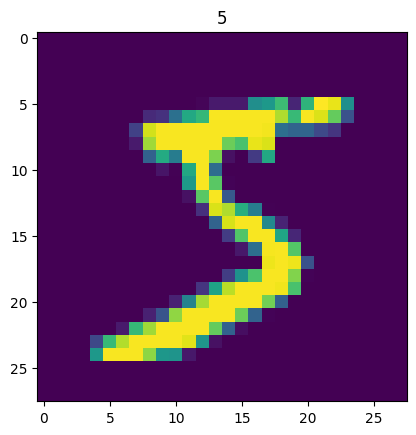

In [357]:
import matplotlib.pyplot as plt

plt.title(y_train[0])
plt.imshow(X_train[0])
plt.show()

**[3.5]** Normalise both the features for the training and testing sets. An image is composed of pixels with values from 0 to 255. We can therefore normalize it by dividing its pixels by the maximum value (ie 255). All pixel values will be then ranging from 0 to 1.

In [358]:
X_train = X_train / 255.0
X_test = X_test / 255.0

**[3.6]** Print the minimum and maximum values of the training and testing sets using .min()

In [359]:
print(X_train.min())
print(X_train.max())
print(X_test.min())
print(X_test.max())

0.0
1.0
0.0
1.0


### 4.   Defining the Architecture of the Multi-Layer Perceptron

**[4.1]** Set the seeds for tensorflow and numpy in order to get reproducible results

In [360]:
tf.random.set_seed(42)

**[4.2]** Instantiate a [.Sequential()](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) class and call it `model`

In [361]:
model = tf.keras.Sequential()

**[4.3]** Import the [Dense()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) and [Flatten()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) classes

In [362]:
from tensorflow.keras.layers import Dense, Flatten

**[4.4]** Convert the input tensors from rank 2 to 1 before feeding them to a fully-connected layer using [Flatten()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten)

In [363]:
flatten_layer = Flatten(input_shape=(28,28))

**[4.5]** Create a hidden layer of 256 fully connected neurins with ReLU as the activation function followed by another fully connected layer responsible of making final predictions

In [364]:
layer1 = Dense(256, activation='relu')
top_layer = Dense(10, activation='softmax')

**[4.6]** Assemble the different layers we just defined to create our first MLP. We will be using the [.add()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/add) method

In [365]:
model.add(flatten_layer)
model.add(layer1)
model.add(top_layer)

**[4.7]** Instantiate the [Adam()](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) class, specify the learning rate to be 0.001 and save it into a variable called `optimizer`

In [366]:
optimizer = tf.keras.optimizers.Adam(0.001)

**[4.8]** Configure the learning process using the [.compile()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#methods_2) method and specify the loss function, optimizer and the metrics to be used

In [367]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

**[4.9]** Print the model architecture with [.summary()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#summary)

In [368]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 256)               200960    
                                                                 
 dense_28 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


### 5. Training and Evaluation of the Model

**[5.1]** Train the model using the [.fit()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method on the training set on 5 epochs and create a validation set (20%)### 5. Training and Evaluation of the Model

In [369]:
history = model.fit(X_train, y_train, epochs=10, validation_split = 0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2494 - accuracy: 0.9286 - val_loss: 0.1276 - val_accuracy: 0.9649
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1019 - accuracy: 0.9695 - val_loss: 0.1042 - val_accuracy: 0.9696
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0683 - accuracy: 0.9798 - val_loss: 0.0853 - val_accuracy: 0.9739
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0477 - accuracy: 0.9853 - val_loss: 0.0811 - val_accuracy: 0.9752
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0356 - accuracy: 0.9888 - val_loss: 0.0844 - val_accuracy: 0.9741
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0270 - accuracy: 0.9918 - val_loss: 0.0859 - val_accuracy: 0.9769
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0201 - accuracy: 0.9937 - val_loss: 0.0928 - val_accuracy:

**[5.2]** Evaluate the performance of this model on the testing set using [.evaluate()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate)

In [370]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0776 - accuracy: 0.9782


[0.07760793715715408, 0.9782000184059143]

### 6. Analysing the Results

**[6.1]** Plot the learning curve for accuracy score on the training and validation sets. We will use the [.plot()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) method to create a line chart.

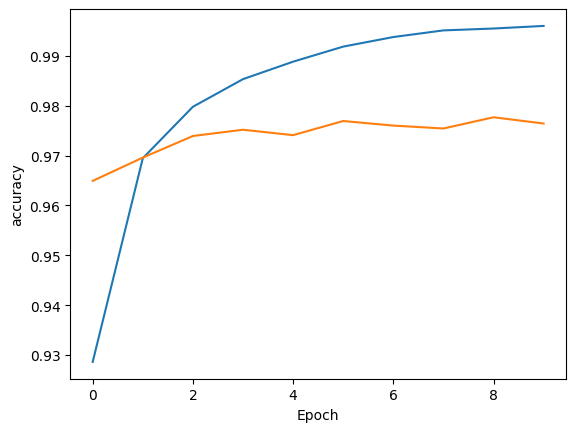

In [371]:
plt.plot(history.history['accuracy'], label='MSE training')
plt.plot(history.history['val_accuracy'], label='MSE validation')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.show()

**[6.2]** Using the trained model, print the predicted outcome on the first observation of the testing set by using the [.predict()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict) method

In [372]:
sparse_pred_test = model.predict(X_test)
sparse_pred_test[0]

313/313 [==============================] - 0s 1ms/step


array([8.0079715e-13, 7.0063759e-12, 5.0413618e-10, 1.9161649e-07,
       9.3711354e-19, 4.0106566e-13, 8.6194759e-18, 9.9999976e-01,
       2.7534536e-10, 5.7526850e-10], dtype=float32)

**[6.3]**  The output from the model is the probability for each class of the target variable. In order to get the final predicted value, we need to the [.argmax()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html) method from numpy.

In [373]:
pred_test = np.argmax(sparse_pred_test, 1)
pred_test[0]

7

**[6.4]** Let's compare this prediction to the actual true value

In [374]:
y_test[0]

7

**[6.5]** Display the confusion matrix using the [.confusion_matrix()](https://www.tensorflow.org/api_docs/python/tf/math/confusion_matrix) method from TensorFlow.

In [375]:
confusion_mat = tf.math.confusion_matrix(pred_test, y_test, num_classes=10)
confusion_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    1,    0,    1,    2,    4,    0,    0,    2],
       [   1, 1126,    4,    1,    1,    0,    2,    6,    0,    2],
       [   0,    2,  993,    1,    2,    0,    0,    6,    2,    0],
       [   1,    1,   12,  994,    0,   11,    1,    2,   13,    6],
       [   3,    0,    2,    0,  955,    2,    7,    1,    4,    6],
       [   0,    1,    0,    3,    0,  868,    4,    0,    1,    3],
       [   3,    2,    0,    0,    4,    2,  940,    0,    1,    0],
       [   2,    0,   12,    5,    0,    1,    0, 1002,    2,    2],
       [   1,    3,    7,    3,    2,    4,    0,    2,  949,    2],
       [   0,    0,    1,    3,   17,    2,    0,    9,    2,  986]])>